### Age of the Universe

#### FLRW Metric
$$ds^2 = c^2dt^2 - a(t)^2\left[ \frac{dr^2}{1-Kr^2} + r^2d\Omega^2 \right]$$ 
where $d\Omega^2 = d\theta^2 + sin^2\phi d\phi^2$

#### Friedmann Equations
1) $H^2 = \left( \frac{\dot{a}}{a} \right)^2 = \frac{8\pi G}{3} \rho - \frac{Kc^2}{a^2}$
2) $\dot{H} + H^2 = \frac{\ddot{a}}{a} = -\frac{4\pi G}{3}\left(\rho + \frac{3p}{c}\right)$

    -$H(a) = H_0\left[ \frac{\Omega_{rad}}{a^4} + \frac{\Omega_c + \Omega_b}{a^3} + \frac{\Omega_k}{a^2} + \frac{\Omega_{\Lambda}}{a^{3(1+w)}} \right]^{1/2}$

    -$\frac{dt}{da} = \frac{1}{aH(a)}$
    
   ##### Hence we can obtain the age of the universe by integrating $\frac{dt}{da}$ from $a=0$ to $a=1$ (We consider $w=-1$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from Planck18 import *
from constants import *

%matplotlib inline

In [2]:
H = lambda a: H0 * (Omega_rad / a**4 + (Omega_c+Omega_b)/a**3 + Omega_k/a**2 + Omega_Lambda/a**(3*(1+w)))**(0.5)

In [3]:
dt_da = lambda a: a / (H0 * (Omega_rad + a*(Omega_c+Omega_b) + a**2 * Omega_k + a**4 * Omega_Lambda) ** 0.5)

In [4]:
age_current = integrate.romberg(dt_da, 0, 1, rtol=1e-3) * Mpc/Km/Gyr
print(age_current, "Gyrs")

13.79436223404569 Gyrs


In [5]:
age_cmb = integrate.romberg(dt_da, 0, 1/1101, rtol=1e-3) * Mpc/Km/Gyr
age_cmb

0.00039668211187583323

In [6]:
age = lambda a: integrate.romberg(dt_da, 0, a, rtol=1e-3) * Mpc/Km/Gyr

In [7]:
A = np.linspace(0, 1, 1000)
Age = []
for i in A:
    Age.append(age(i))

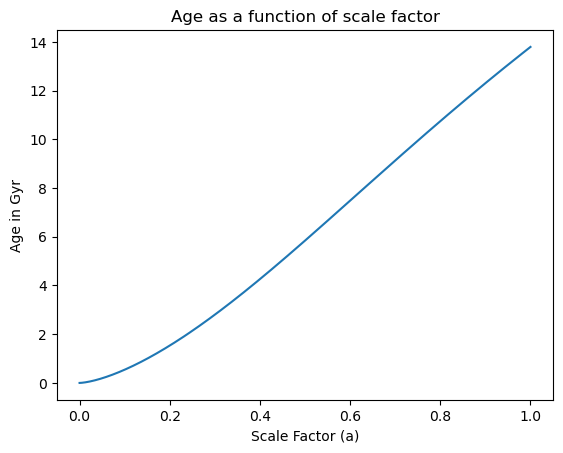

In [8]:
plt.plot(A, Age)
plt.xlabel("Scale Factor (a)")
plt.ylabel("Age in Gyr")
plt.title("Age as a function of scale factor")
plt.show()